In [ ]:
import platform
from pathlib import Path
from datetime import datetime, timedelta
import datajoint as dj
dj.blob.use_32bit_dims = True # necessary for pd.blob read



from create_trials_df import create_trials_df_from_dj
from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df
# from plot_trials_info import *

from multiplot_summaries import *

import plot_utils as pu
import dj_utils as dju
import dir_utils as du

# from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df
# from plot_days_info import *

# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

[2023-07-27 15:21:48,009][INFO]: Connecting jbreda@bdata00.pni.princeton.edu:3306
[2023-07-27 15:21:48,168][INFO]: Connected jbreda@bdata00.pni.princeton.edu:3306


In [ ]:
# PATHS
if platform.system() == "Windows":
    FIGURES_PATH = Path(
        "C:\\Users\\JB\\github\\jbreda_animal_training\\figures\\mice\\cohort3"
    )
    DATA_PATH = Path("C:\\Users\\JB\\github\\jbreda_animal_training\\data\\days_dfs")
else:
    FIGURES_PATH = Path(
        "/Users/jessbreda/Desktop/github/jbreda_animal_training/figures/mice/cohort3"
    )
    DATA_PATH = Path(
        "/Users/jessbreda/Desktop/github/jbreda_animal_training/data/days_dfs"
    )

# ANIMALS
ANIMAL_IDS = ["R511", "R512", "R513"]

# DATES
date_min, date_max = dju.return_date_window(latest_date=None, n_days_back=20)
few_days_ago = (datetime.today() - timedelta(days=4)).strftime("%Y-%m-%d")

In [ ]:
# LOAD IN TRIALS DATA
trials_df = create_trials_df_from_dj(animal_ids=ANIMAL_IDS, date_min=few_days_ago)

# just today
# date_min=datetime.today().strftime("%Y-%m-%d")

fetched 5 sessions for R511 between 2023-07-23 and 2023-07-27
fetched 5 sessions for R512 between 2023-07-23 and 2023-07-27
fetched 5 sessions for R513 between 2023-07-23 and 2023-07-27


In [5]:
# PLOT TRIALS DATA
multiplot_single_day_summaries(
    trials_df, figures_path=FIGURES_PATH, save_out=True, overwrite=False
)

making R511_2023-07-27_day_summary
making R512_2023-07-27_day_summary
making R513_2023-07-27_day_summary


In [ ]:
date_max_dt = trials_df["date"].max()
trials_df.query("date == @date_max_dt").groupby("animal_id").give_type_imp.unique()

animal_id
R511    ['water_and_light', 'light']
Categories (2, ob...
R512    ['water_and_light', 'light']
Categories (2, ob...
R513    ['light', 'water_and_light']
Categories (2, ob...
Name: give_type_imp, dtype: object

In [ ]:
trials_df.query("date == @date_max_dt").groupby(
    "animal_id"
).water_delivered.sum() / 1000

animal_id
R511    0.8302
R512    1.0584
R513    1.2006
Name: water_delivered, dtype: float64

In [ ]:
trials_df.query("date == @date_max_dt").groupby("animal_id").stage.max()

animal_id
R511    3.0
R512    4.0
R513    3.0
Name: stage, dtype: float64

In [ ]:
# # DISPLAY TRIALS DATA
# multiplot_single_day_summaries(
#     trials_df, figures_path=FIGURES_PATH, save_out=False, overwrite=False
# )

In [6]:
# LOAD IN DAYS DATA
# days_df = create_days_df_from_dj(
#     animal_ids=ANIMAL_IDS, date_min=date_min, date_max=date_max
# )

f_name = "R51s_days_df.csv"

# days_df.to_csv(DATA_PATH / f_name, index=False)

days_df = lazy_load_days_summary_df(
    date_min=date_min,
    date_max=date_max,
    animal_ids=ANIMAL_IDS,
    save_dir=DATA_PATH,
    f_name=f_name,
    save_out=True,
)

partial dj load with new date min 2023-07-07 -> 2023-07-27
Returning appended df with entries between 2023-07-07 and 2023-07-27
Saved out appended df to C:\Users\JB\github\jbreda_animal_training\data\days_dfs\R51s_days_df.csv


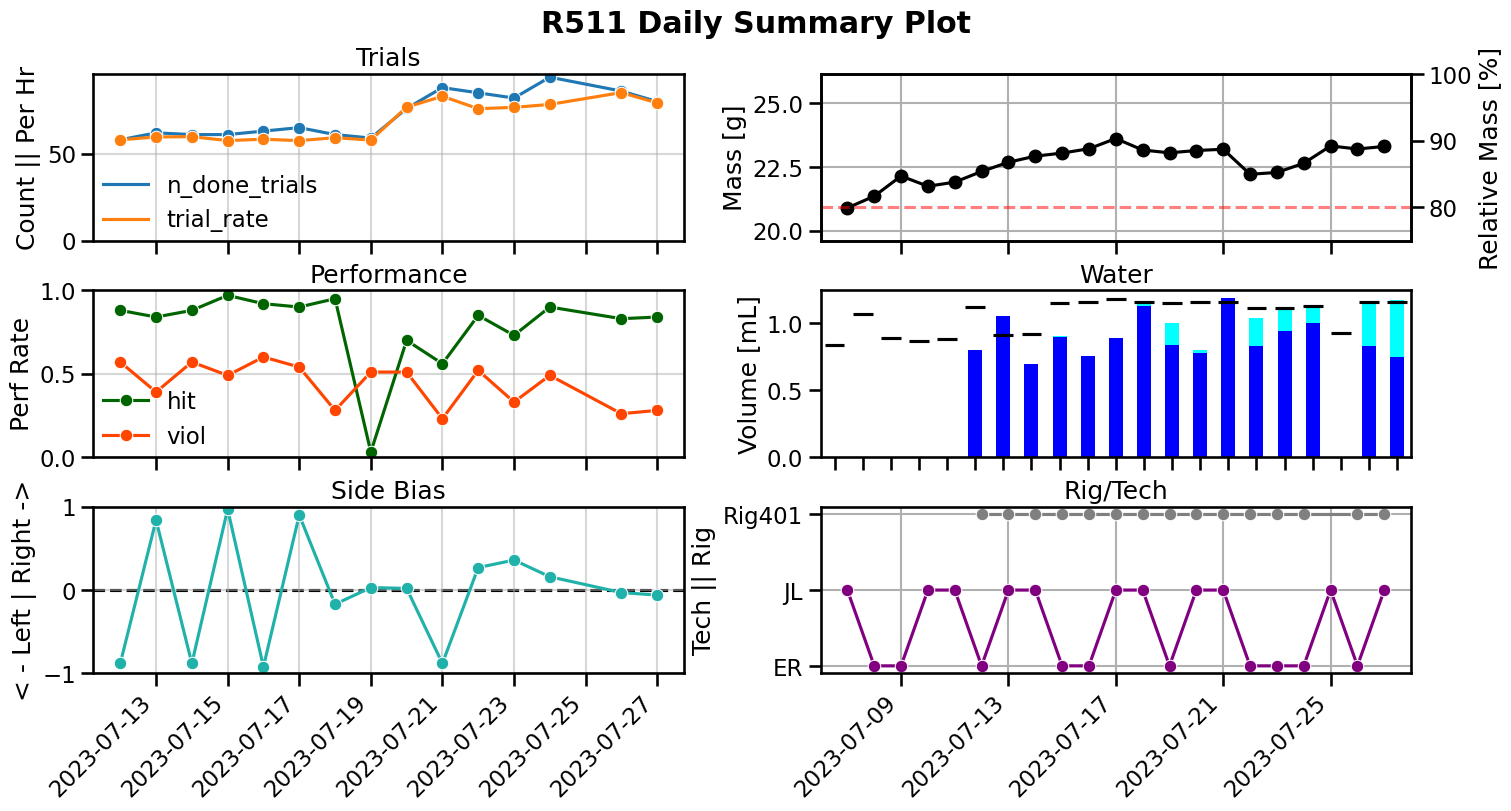

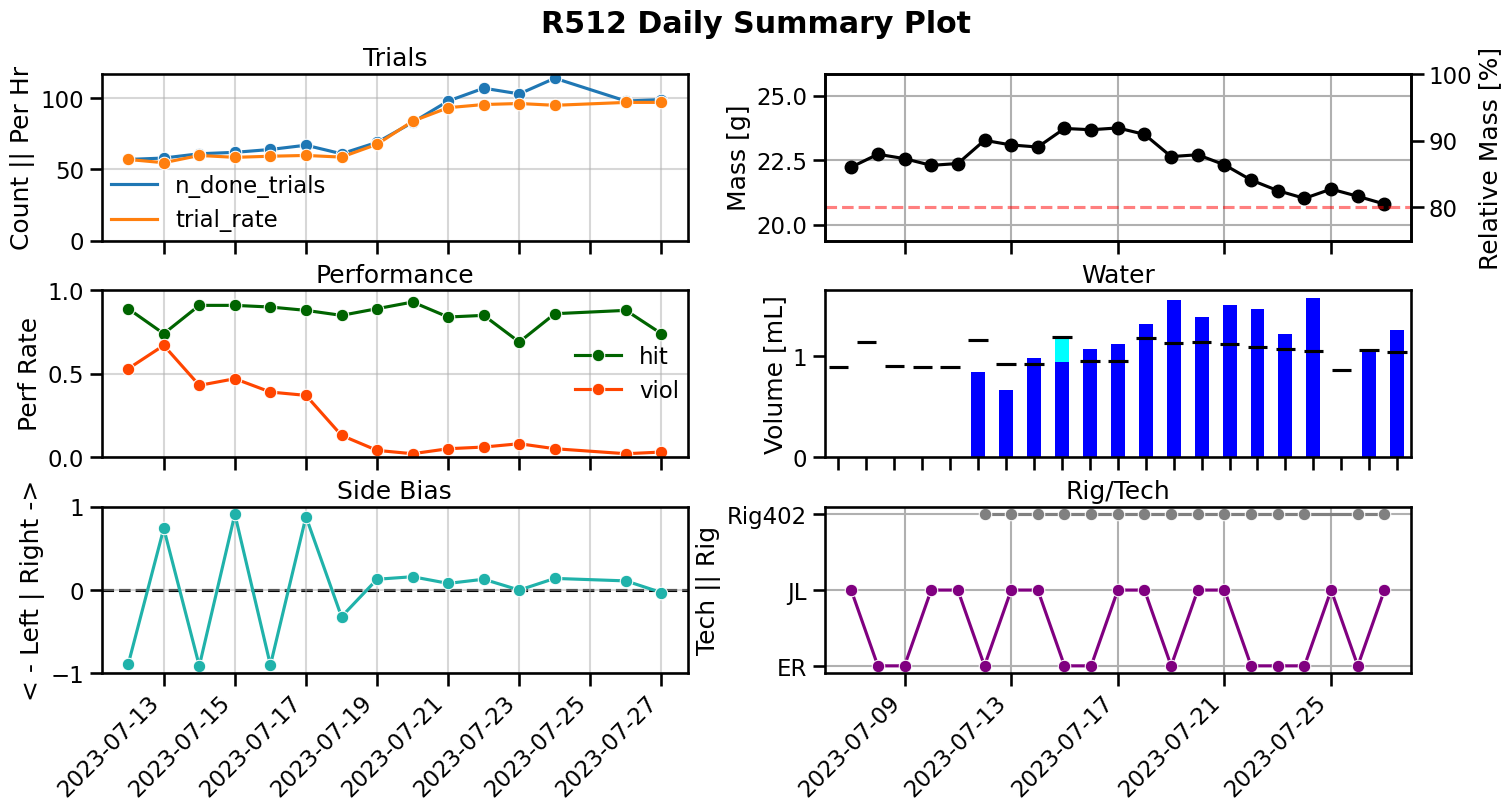

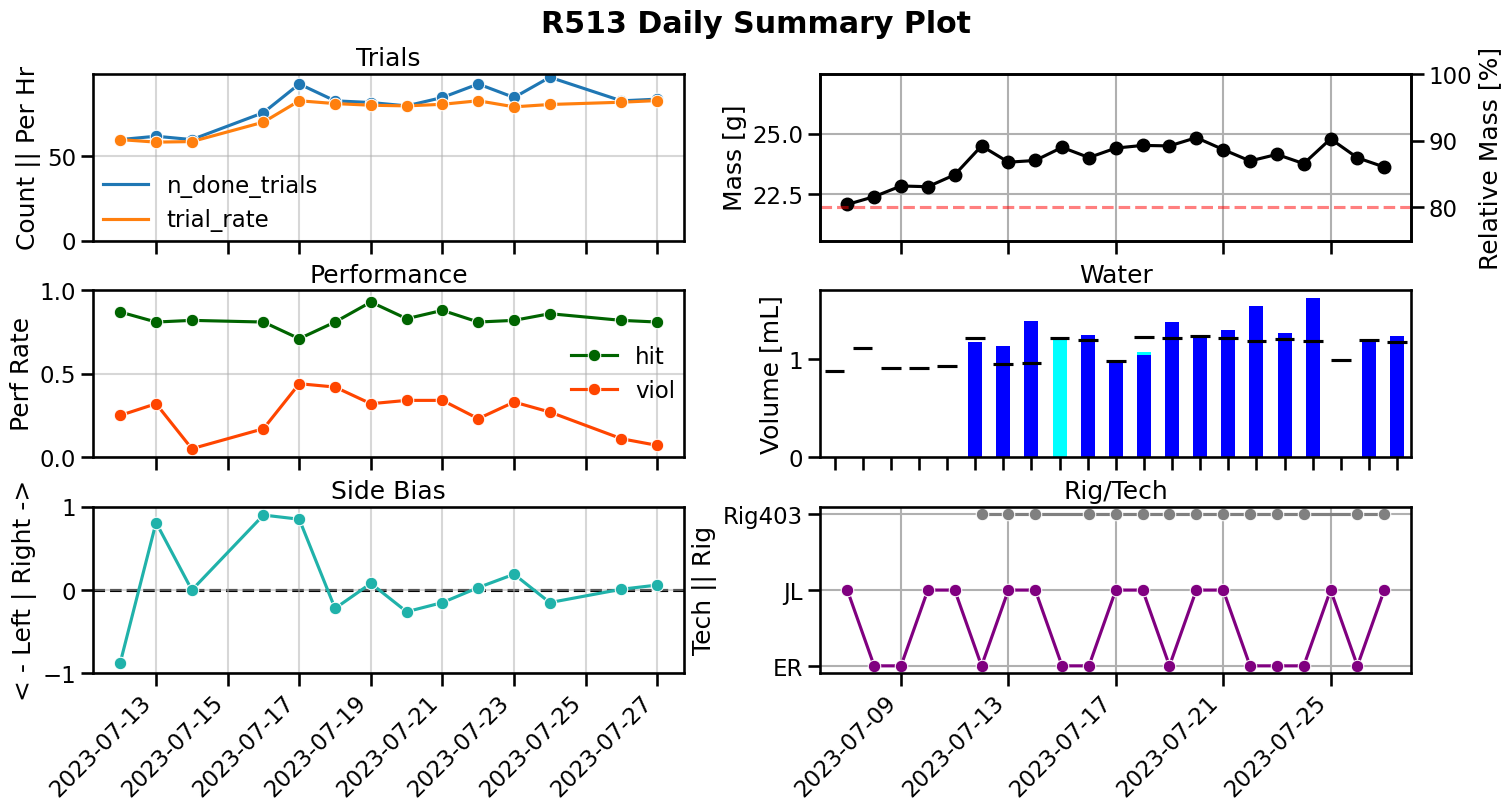

In [7]:
for animal_id, sub_df in days_df.groupby("animal_id"):
    multiplot_multi_day_summary(animal_id, sub_df)